<a href="https://colab.research.google.com/github/Veron28/bot_test/blob/master/rudalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">Ru DALLE by Data Secrets</font></b>


<b><font color="black" size="+2">Colab created by:</font></b>

Telegram: [@DataSecrets](https://t.me/+LfNZR2WTuNk5MjMy)

```
Чтобы получить результат, поочередно нажимайте на запуск ячеек, дожидаясь завершения выполнения каждого блока.
```

In [1]:
#@title Доступные ресурсы
import multiprocessing
import torch
from psutil import virtual_memory

ram_gb = round(virtual_memory().total / 1024**3, 1)

print('CPU:', multiprocessing.cpu_count())
print('RAM GB:', ram_gb)
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device.type)

!nvidia-smi

CPU: 2
RAM GB: 12.7
PyTorch version: 1.12.1+cu113
CUDA version: 11.3
cuDNN version: 8302
device: cuda
Wed Sep 14 19:52:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------

In [3]:
!pip install pynvml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.4 MB/s 


In [4]:
from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
if info.total>16252636672:
  print('Everything is ok, you can begin')
else:
  print('We dont recomend to begin, you gonna get Out of memory')

We dont recomend to begin, you gonna get Out of memory


# Install all we need

In [5]:
!pip install rudalle==0.0.1rc4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 1.7 MB 59.8 MB/s 
     |████████████████████████████████| 51 kB 267 kB/s 
     |████████████████████████████████| 2.8 MB 47.6 MB/s 
     |████████████████████████████████| 45 kB 3.9 MB/s 
     |████████████████████████████████| 707 kB 70.8 MB/s 
     |████████████████████████████████| 117 kB 73.0 MB/s 
     |████████████████████████████████| 5.9 MB 63.2 MB/s 
     |████████████████████████████████| 419 kB 49.7 MB/s 
     |████████████████████████████████| 880 kB 64.7 MB/s 
     |████████████████████████████████| 120 kB 66.3 MB/s 
     |████████████████████████████████| 3.3 MB 56.4 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=d03633a0e47b8b531086a84e00da62d540fbec47bee720d958b027776381cc6b
  Stored in directory: /root

# data to dataloader

## We  gonna generate some sneakers

In [6]:
#@markdown Lets download data
!gdown https://drive.google.com/uc?id=1p4xwKEDHPhm18zBS_pMVJ1mp2Y5CE1a8
!gdown https://drive.google.com/uc?id=1iSDbibP-o9gIk9YzpmI-Y_h_uWPqxTZh
!unzip sneaksa.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: content/sneaks/Image_3368.jpg  
  inflating: content/sneaks/Image_5285.jpg  
  inflating: content/sneaks/Image_641.jpg  
  inflating: content/sneaks/Image_3752.jpg  
  inflating: content/sneaks/Image_8937.jpg  
  inflating: content/sneaks/Image_5196.jpg  
  inflating: content/sneaks/Image_282.jpg  
  inflating: content/sneaks/Image_7302.jpg  
  inflating: content/sneaks/Image_7307.jpg  
  inflating: content/sneaks/Image_162.jpg  
  inflating: content/sneaks/Image_7005.jpg  
  inflating: content/sneaks/Image_3792.jpg  
  inflating: content/sneaks/Image_2752.jpg  
  inflating: content/sneaks/Image_5824.jpg  
  inflating: content/sneaks/Image_1224.jpg  
  inflating: content/sneaks/Image_3874.jpg  
  inflating: content/sneaks/Image_2552.jpg  
  inflating: content/sneaks/Image_4759.jpg  
  inflating: content/sneaks/Image_6246.jpg  
  inflating: content/sneaks/Image_1274.jpeg  
  inflating: content/sneaks/Image_

In [7]:
#@markdown import model
from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_clip
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan, get_ruclip
from rudalle.utils import seed_everything




device = 'cuda'
model = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)
vae = get_vae().to(device)
tokenizer = get_tokenizer()

/usr/local/lib/python3.7/dist-packages/huggingface_hub/file_download.py:624: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready


In [8]:
#@markdown Data preparation
import io
import os
import PIL
import random
import numpy as np
import torch
import torchvision
import transformers
import more_itertools
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from torch.utils.data import Dataset
from tqdm import tqdm
from dataclasses import dataclass, field
import torchvision.transforms as T
import torchvision.transforms.functional as TF


class RuDalleDataset(Dataset):
    clip_filter_thr = 0.24
    def __init__(
            self,
            file_path,
            csv_path,
            tokenizer,
            resize_ratio=0.75,
            shuffle=True,
            load_first=None,
            caption_score_thr=0.6
    ):
        """ tokenizer - объект с методами tokenizer_wrapper.BaseTokenizerWrapper """
       
        self.text_seq_length = model.get_param('text_seq_length')
        self.tokenizer = tokenizer
        self.target_image_size = 256
        self.image_size=256
        self.samples = []


        self.image_transform = T.Compose([
                T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
                T.RandomResizedCrop(self.image_size,
                                    scale=(1., 1.), # в train было scale=(0.75., 1.),
                                    ratio=(1., 1.)),
                T.ToTensor()
            ])
        
        df = pd.read_csv(csv_path)
        for caption, f_path  in zip(df['caption'], df['name']):
            if len(caption)>10 and len(caption)<100 and os.path.isfile(f'{file_path}/{f_path}'):

              self.samples.append([file_path, f_path, caption])
        if shuffle:
            np.random.shuffle(self.samples)
            print('Shuffled')
    
    def __len__(self):
        return len(self.samples)

    def load_image(self, file_path, img_name):
        image = PIL.Image.open(f'{file_path}/{img_name}')
        return image

    def __getitem__(self, item):
        item = item % len(self.samples)  # infinite loop, modulo dataset size
        file_path, img_name, text = self.samples[item]
        try:
          image = self.load_image(file_path, img_name)
          image = self.image_transform(image).to(device)
        except Exception as err:  # noqa
            print(err)
            random_item = random.randint(0, len(self.samples) - 1)
            return self.__getitem__(random_item)
        text =  tokenizer.encode_text(text, text_seq_length=self.text_seq_length).squeeze(0).to(device)
        return text, image

In [9]:
class Args():
    def __init__(self):
     
        self.text_seq_length = model.get_param('text_seq_length')
        self.total_seq_length = model.get_param('total_seq_length')
        self.epochs = 1
        self.save_path='checkpoints/'
        self.model_name = 'awesomemodel_'
        self.save_every = 2000
        self.prefix_length = 10
        self.bs = 1
        self.clip = 0.24
        self.lr = 4e-5
        self.warmup_steps =50
        self.wandb = True
args = Args()
if not os.path.exists(args.save_path):
        os.makedirs(args.save_path)

#RuDalle Dataset class
##Simple dataset class where you pass .csv with 


filepath - name of dir where you store images

________________________

**name     |     caption**
________________________
*Image name* | *Caption*

In [10]:
from torch.utils.data import Dataset, DataLoader
st = RuDalleDataset(file_path='content/sneaks/' ,csv_path ='data_desc.csv',tokenizer=tokenizer)
train_dataloader = DataLoader(st, batch_size=args.bs, shuffle=True, drop_last=True)

Shuffled


In [11]:
from transformers import  AdamW, get_linear_schedule_with_warmup
model.train()
optimizer = AdamW(model.parameters(), lr = args.lr)

scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=args.lr, 
                                                final_div_factor=500,  
                                                steps_per_epoch=len(train_dataloader), epochs=args.epochs )




In [12]:
def freeze(
    model,
    freeze_emb=True,
    freeze_ln=False,
    freeze_attn=False,
    freeze_ff=True,
    freeze_other=True,
):
    for name, p in model.module.named_parameters():
        name = name.lower()
        if 'ln' in name or 'norm' in name:
            p.requires_grad = not freeze_ln
        elif 'embeddings' in name:
            p.requires_grad = not freeze_emb
        elif 'mlp' in name:
            p.requires_grad = not freeze_ff
        elif 'attn' in name:
            p.requires_grad = not freeze_attn
        else:
            p.requires_grad = not freeze_other
    return model

In [13]:
#markdown Simple training loop
def train(model,args: Args, train_dataloader: RuDalleDataset):
  
  
  """
  args - arguments for training

  train_dataloader - RuDalleDataset class with text - image pair in batch
  """
  loss_logs = []
  try:
    progress = tqdm(total=len(train_dataloader), desc='finetuning goes brrr')
    save_counter = 0
    for epoch in range(args.epochs):
      
      for text, images in train_dataloader:
        device = model.get_param('device')
        save_counter+=1
        model.zero_grad()
        attention_mask = torch.tril(torch.ones((args.bs, 1, args.total_seq_length, args.total_seq_length), device=device))
        image_input_ids = vae.get_codebook_indices(images)
        
        input_ids = torch.cat((text, image_input_ids), dim=1) 
        loss, loss_values = model.forward(input_ids, attention_mask, return_loss=True)
        #train step
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(),args.clip)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        #save every here
        if save_counter % args.save_every == 0:
          print(f'Saveing checkpoint here {args.model_name}_dalle_{save_counter}.pt')
          
          plt.plot(loss_logs)
          plt.show()
          torch.save(
                    model.state_dict(),
                    os.path.join(args.save_path,f"{args.model_name}_dalle_{save_counter}.pt")
                    )
        if args.wandb:
          wandb.log({"loss":  loss.item()})
        loss_logs+=[loss.item()]
        progress.update()
        progress.set_postfix({"loss": loss.item()})
    
    print(f'Complitly tuned and saved here  {args.model_name}__dalle_last.pt')
    
    plt.plot(loss_logs)
    plt.show()
    
    torch.save(
                model.state_dict(),
                os.path.join(args.save_path,f"{args.save_path}/{args.model_name}_dalle_last.pt")
                )
  
  except KeyboardInterrupt:
    
    
    print(f'What for did you stopped? Please change model_path to /{args.save_path}/{args.model_name}_dalle_Failed_train.pt')
    plt.plot(loss_logs)
    plt.show()
    
    torch.save(
                model.state_dict(),
                os.path.join(args.save_path,f"{args.save_path}/{args.model_name}_dalle_Failed_train.pt")
                )
  except Exception as err:
    print(f'Failed with {err}')

In [14]:
#@markdown You can unfreeze or freeze more parametrs, but it can 
model = freeze(model = model,
    freeze_emb=False,
    freeze_ln=False,
    freeze_attn=True,
    freeze_ff=True,
    freeze_other=False)#freeze params to 

train(model, args, train_dataloader)

finetuning goes brrr:   0%|          | 0/9406 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:109: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim
finetuning goes brrr:   0%|          | 0/9406 [00:10<?, ?it/s]

Failed with name 'wandb' is not defined


# Lets generate

100%|██████████| 1024/1024 [00:56<00:00, 18.15it/s]


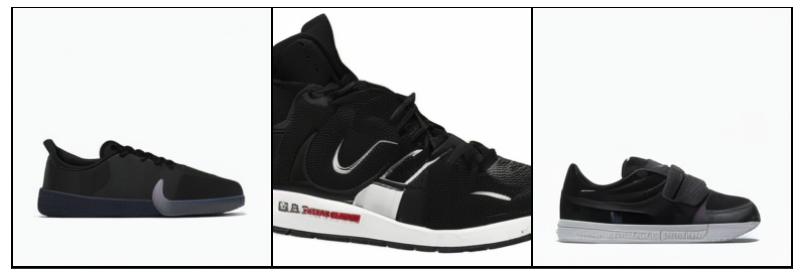

In [17]:
pil_images = []
scores = []
text = 'Кроссовки, Nike, цвет: черный'

for top_k, top_p, images_num in [(2048, 0.995, 3)]:
    _pil_images, _scores = generate_images(text, tokenizer, model, vae,
                                           top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
show([pil_image for pil_image in pil_images], 3)

100%|██████████| 1024/1024 [00:42<00:00, 24.00it/s]


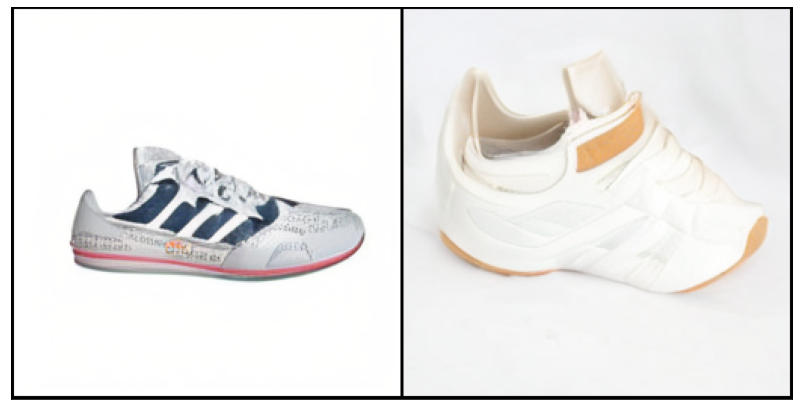

In [21]:
pil_images = []
scores = []
text = 'Кроссовки, Adidas superstar, цвет: белый'

for top_k, top_p, images_num in [(2048, 0.995, 2)]:
    _pil_images, _scores = generate_images(text, tokenizer, model, vae, top_k=top_k, images_num=images_num, top_p=top_p)
    pil_images += _pil_images
show([pil_image for pil_image in pil_images], 2)